In [1]:
import datetime as dt
import numpy as np
from mtgoScraper import *

queryFormat = "pioneer"

if __name__ == "__main__":
    endDate = dt.datetime.today()
    startDate = endDate - dt.timedelta(weeks=1)

    startMonth = dt.datetime(startDate.year, startDate.month, 1)
    endMonth = dt.datetime(endDate.year, endDate.month, 1)
    months = pd.date_range(start=startMonth, end=endMonth, freq="MS")

    startDate = dt.date(startDate.year, startDate.month, startDate.day)

    rawDeckLists = []
    for month in months:
        monthList = mtgoScrape.formatDeckList(queryFormat, month.year, month.month)
        rawDeckLists += monthList

    skipUrls = []

    urlList = [
        x["url"]
        for x in rawDeckLists
        if x["url"] not in skipUrls
        if x["date"] >= startDate
    ]

    deckList = mtgoScrape.mtgoScrapeMain(urlList, queryFormat)

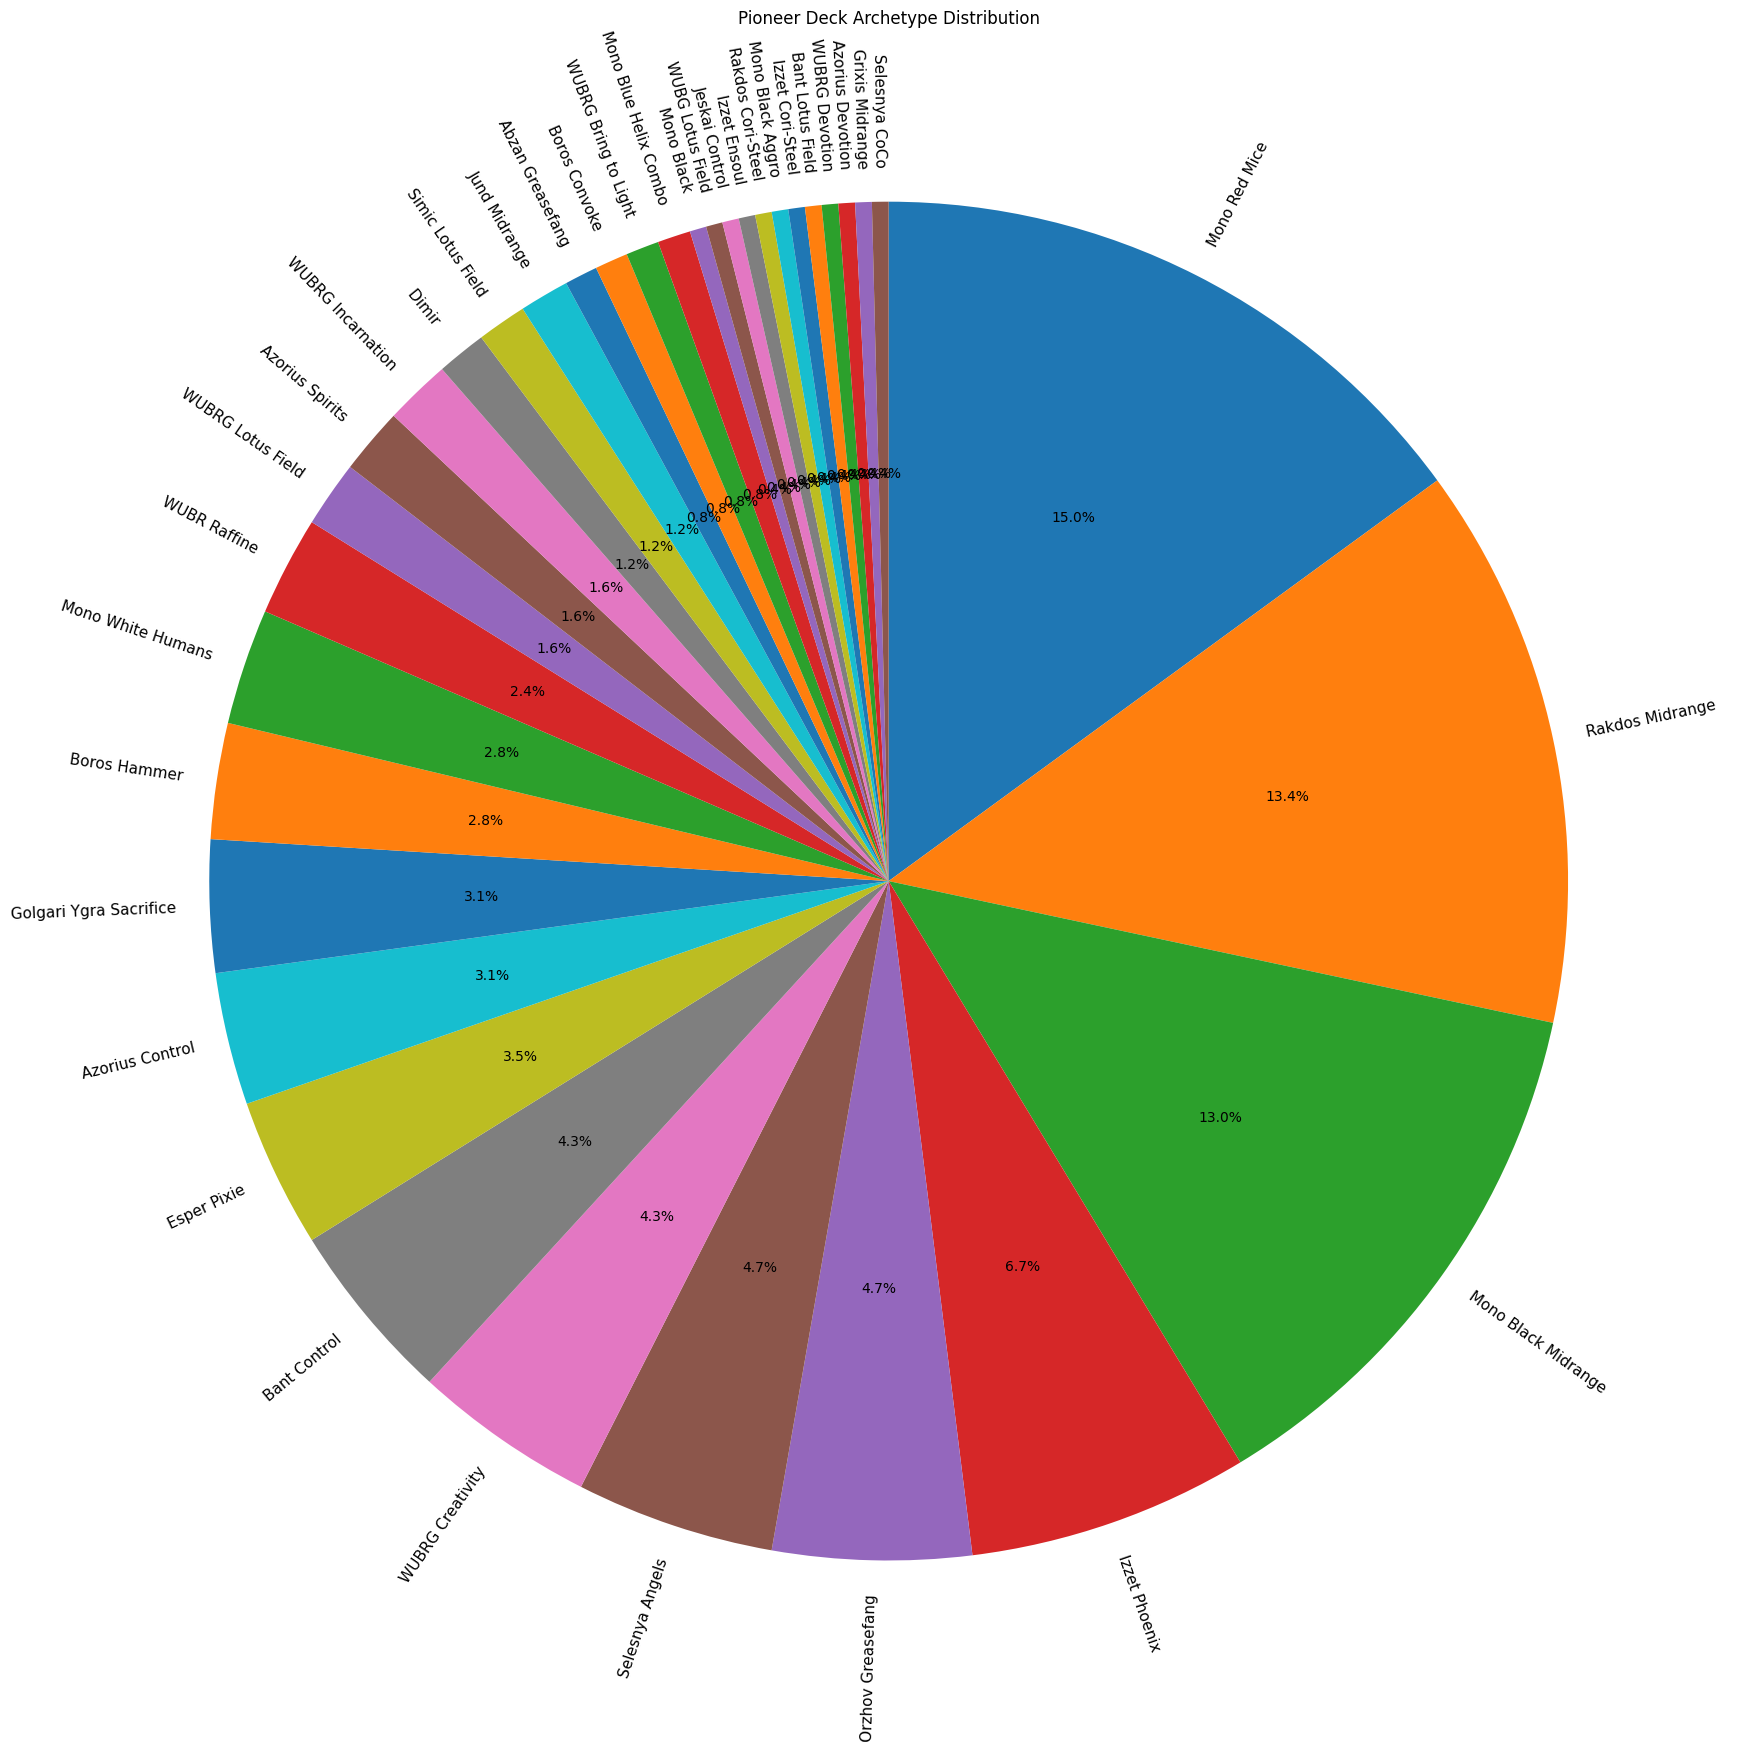

In [2]:
decks = [x.deckName for x in deckList]
deck_series = pd.Series(decks)
deck_counts = deck_series.value_counts()

# Create pie chart
fig, ax = plt.subplots(figsize=(18, 18))
wedges, _, _ = ax.pie(deck_counts, startangle=90, counterclock=False, autopct="%1.1f%%")

# Manually place labels at wedge centers
total = sum(deck_counts)
for i, wedge in enumerate(wedges):
    # Compute center angle of wedge
    angle = (wedge.theta2 + wedge.theta1) / 2
    angle_rad = np.deg2rad(angle)

    # Position label slightly outside the wedge
    x = np.cos(angle_rad)
    y = np.sin(angle_rad)

    # Flip alignment and rotation for left side
    ha = "left" if x >= 0 else "right"
    rotation = angle if x >= 0 else angle + 180

    ax.text(
        x * 1.05,
        y * 1.05,
        deck_counts.index[i],
        ha=ha,
        va="center",
        rotation=rotation,
        rotation_mode="anchor",
        fontsize=11,
    )

plt.title(f"{queryFormat.title()} Deck Archetype Distribution")
plt.tight_layout()
plt.show()


In [3]:
keyCardNum = len([x.deckDf for x in deckList if x.keyCard == []])
print(f"{keyCardNum} deck(s) without any of the specified key cards")
show = keyCardNum
if keyCardNum > 0:
    i = 0
    x = [x for x in deckList if x.keyCard == []][i]
    print(f"{x.deckName}")
    show = x.deckDf[~x.deckDf["type_line"].str.contains("Land")]
show

5 deck(s) without any of the specified key cards
Mono Black 


Main/Side  \
Deck URL                                          Deck               
/decklist/pioneer-challenge-32-2025-08-2412812178 Deck 2      Main   
                                                  Deck 2      Main   
                                                  Deck 2      Main   
                                                  Deck 2      Main   
                                                  Deck 2      Main   
                                                  Deck 2      Main   
                                                  Deck 2      Main   
                                                  Deck 2      Main   
                                                  Deck 2      Side   
                                                  Deck 2      Side   
                                                  Deck 2      Side   
                                                  Deck 2      Main   
                                                  Deck 2      Main   
                                                  Deck 2      Main   
                                                  Deck 2      Side   
                                                  Deck 2      Main   
                                                  Deck 2      Side   
                                                  Deck 2      Side   
                                                  Deck 2      Side   
                                                  Deck 2      Side   
                                                  Deck 2      Side   

                                                                          Card Name  \
Deck URL                                          Deck                                
/decklist/pioneer-challenge-32-2025-08-2412812178 Deck 2          Gifted Aetherborn   
                                                  Deck 2                 Fatal Push   
                                                  Deck 2               Unholy Annex   
                                                  Deck 2               Thoughtseize   
                                                  Deck 2        Unstoppable Slasher   
                                                  Deck 2       Graveyard Trespasser   
                                                  Deck 2     Archfiend of the Dross   
                                                  Deck 2          Archenemy's Charm   
                                                  Deck 2        Leyline of the Void   
                                                  Deck 2           Extinction Event   
                                                  Deck 2  Sheoldred, the Apocalypse   
                                                  Deck 2          Go for the Throat   
                                                  Deck 2           Blade of the Oni   
                                                  Deck 2             Invoke Despair   
                                                  Deck 2                     Duress   
                                                  Deck 2                     Duress   
                                                  Deck 2                   Go Blank   
                                                  Deck 2             Invoke Despair   
                                                  Deck 2             Nowhere to Run   
                                                  Deck 2      The Meathook Massacre   
                                                  Deck 2          Withering Torment   

                                                          Quantity  \
Deck URL                                          Deck               
/decklist/pioneer-challenge-32-2025-08-2412812178 Deck 2         4   
                                                  Deck 2         4   
                                                  Deck 2         4   
                                                  Deck 2         4   
                        

In [4]:
# DataFrame showing the most common non-land cards in the format.
onOff = "off"
if onOff == "on":
    cardDf = (
        pd.concat([x.deckDf for x in deckList])
        .reset_index()
        .groupby("Card Name")["Quantity"]
        .sum()
        .reset_index()
    )
    cardDf = cardDf.sort_values(by="Quantity", ascending=False)
    cardDf = identifyDeck.enrichDataFrame(cardDf, oracle.expandedClean())
    cardDf[~cardDf["type_line"].str.contains("Land")]
    cardDf["Quantity"] = round(cardDf["Quantity"] / len(deckList), 2)
    cardDf

In [5]:
filteredDecks = [x.deckId for x in deckList if x.deckName == "Izzet Phoenix"]

In [6]:
includedCardList = ["Cori-Steel Cutter"]
excludedCardList = ["Cloud, Midgar Mercenary", "Arclight Phoenix"]
Queries.avgDecksWithCard(
    deckList, includedCardList, "Main", excludedCardList, "Main", "Main"
)

Card Name
Cori-Steel Cutter                 4.00
Mox Amber                         2.67
Blackcleave Cliffs                1.33
Blazemire Verge                   1.33
Blood Crypt                       1.33
Armed and Armored                 1.33
Magda, Brazen Outlaw              1.33
Clockwork Percussionist           1.33
Colossus Hammer                   1.33
Consider                          1.33
Deadly Dispute                    1.33
Experimental Synthesizer          1.33
Giott, King of the Dwarves        1.33
Fatal Push                        1.33
Inspiring Vantage                 1.33
Leyline Axe                       1.33
Rona, Herald of Invasion          1.33
Oni-Cult Anvil                    1.33
Mutavault                         1.33
Needleverge Pathway               1.33
Mishra's Research Desk            1.33
Battlefield Forge                 1.33
Riverglide Pathway                1.33
Sulfurous Springs                 1.33
Weapons Manufacturing             1.33
Toolcraft Exemp

In [7]:
Queries.aggDecksWithCard(
    deckList, [], "Main", [], "Main", "Main"
)

Card Name
Swamp                         684
Mountain                      586
Fatal Push                    448
Thoughtseize                  436
Mutavault                     428
                             ... 
Tolsimir, Friend to Wolves      1
Impulse                         1
Blast Zone                      1
Behold the Beyond               1
Zoetic Glyph                    1
Name: Quantity, Length: 471, dtype: int64

In [8]:
Queries.avgArchetype(deckList, "Izzet Phoenix", "Main")

Main/Side  \
Deck URL                                          Deck                
/decklist/pioneer-challenge-32-2025-08-2312812170 Deck 11      Main   
                                                  Deck 11      Main   
                                                  Deck 11      Main   
                                                  Deck 11      Main   
                                                  Deck 11      Main   
...                                                             ...   
/decklist/pioneer-challenge-32-2025-08-2912812775 Deck 27      Main   
                                                  Deck 27      Main   
                                                  Deck 27      Main   
                                                  Deck 27      Main   
                                                  Deck 27      Main   

                                                                        Card Name  \
Deck URL                                          Deck                              
/decklist/pioneer-challenge-32-2025-08-2312812170 Deck 11        Arclight Phoenix   
                                                  Deck 11         Artist's Talent   
                                                  Deck 11                Consider   
                                                  Deck 11       Cori-Steel Cutter   
                                                  Deck 11      Riverglide Pathway   
...                                                                           ...   
/decklist/pioneer-challenge-32-2025-08-2912812775 Deck 27    Hall of Storm Giants   
                                                  Deck 27  Proft's Eidetic Memory   
                                                  Deck 27            Spell Pierce   
                                                  Deck 27       Temporal Trespass   
                                                  Deck 27       Stormcarved Coast   

                                                           Quantity  \
Deck URL                                          Deck                
/decklist/pioneer-challenge-32-2025-08-2312812170 Deck 11         4   
                                                  Deck 11         4   
                                                  Deck 11         4   
                                                  Deck 11         4   
                                                  Deck 11         4   
...                                                             ...   
/decklist/pioneer-challenge-32-2025-08-2912812775 Deck 27         1   
                                                  Deck 27         1   
                                                  Deck 27         1   
                                                  Deck 27         1   
                                                  Deck 27         1   

                                                              mana_cost  \
Deck URL                                          Deck                    
/decklist/pioneer-challenge-32-2025-08-2312812170 Deck 11        {3}{R}   
                                                  Deck 11        {1}{R}   
                                                  Deck 11           {U}   
                                                  Deck 11        {1}{R}   
                                                  Deck 11                 
...                                                                 ...   
/decklist/pioneer-challenge-32-2025-08-2912812775 Deck 27                 
                                                  Deck 27        {1}{U}   
                                                  Deck 27           {U}   
                                                  Deck 27  {8}{U}{U}{U}   
                                                  Deck 27                 

                                                                       type_line  \
Deck URL                                    